#### Import libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline

#### Load data

In [2]:
df = pd.read_csv('./data/mbb_teams_games_sr.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,7,16,21,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.head())

                                game_id  season  status coverage neutral_site  \
0  4069f80e-04f0-4f69-a563-86014bbe95a0    2015  closed     full          NaN   
1  7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51    2015  closed     full          NaN   
2  320ccf7a-8a32-4ce6-a561-10687985c6a6    2015  closed     full          NaN   
3  1a689aee-fec2-49df-822d-993e2826744b    2017  closed     full        False   
4  6314105c-8456-4b35-bfbf-1ec04749ff09    2017  closed     full        False   

  scheduled_date                 gametime conference_game tournament  \
0     2015-12-03  2015-12-03 03:00:00 UTC             NaN        NaN   
1     2016-01-17  2016-01-17 02:00:00 UTC             NaN        NaN   
2     2015-12-22  2015-12-22 20:00:00 UTC             NaN        NaN   
3     2017-12-10  2017-12-10 00:00:00 UTC           False        NaN   
4     2017-12-09  2017-12-09 21:00:00 UTC           False        NaN   

  tournament_type           ...            opp_fast_break_pts  \
0             N

In [4]:
# drop columns we don't need
df.drop(['game_id', 'status', 'coverage', 'logo_large', 'logo_medium', 'logo_small', 'possession_arrow', 'venue_id', 'team_id', 'league_id', 'conf_id', 'conf_name', 'division_name', 'opp_id', 'opp_league_id', 'opp_league_name', 'opp_conf_id', 'opp_conf_name', 'opp_division_id', 'opp_division_name', 'opp_logo_large', 'opp_logo_medium', 'opp_logo_small',], axis=1, inplace=True)


In [5]:
df.dtypes

season                          int64
neutral_site                   object
scheduled_date                 object
gametime                       object
conference_game                object
tournament                     object
tournament_type                object
tournament_round               object
tournament_game_no             object
attendance                    float64
lead_changes                  float64
times_tied                    float64
periods                       float64
venue_city                     object
venue_state                    object
venue_address                  object
venue_zip                      object
venue_country                  object
venue_name                     object
venue_capacity                float64
home_team                        bool
name                           object
market                         object
alias                          object
league_name                    object
league_alias                   object
conf_alias  

In [6]:
df.describe(include='all')

,season,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,tournament_round,tournament_game_no,attendance,...,opp_fast_break_pts,opp_second_chance_pts,opp_team_turnovers,opp_points_off_turnovers,opp_team_rebounds,opp_flagrant_fouls,opp_player_tech_fouls,opp_team_tech_fouls,opp_coach_tech_fouls,created
count,59610.000000,23956,59610,59610,35942,4320,4320,4310,1306,49068.000000,...,48620.000000,50230.000000,50088.000000,50255.000000,50597.000000,51591.000000,51591.000000,24099.000000,22448.000000,59610
unique,NaN,2,717,8374,2,2,68,25,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220
top,NaN,False,2016-11-12,2016-11-12 00:00:00 UTC,True,Conference,CIT,First Round,Game 1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 16:39:59 UTC
freq,NaN,21250,338,112,18314,2896,262,1110,342,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5508
mean,2015.005435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5301.714356,...,6.113040,10.374955,0.328482,13.978947,3.148072,0.017193,0.091159,0.035105,0.026372,NaN
std,1.415258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5779.653509,...,5.065954,5.439629,0.684656,6.389495,2.062462,0.133522,0.411793,0.191562,0.167048,NaN
min,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1411.000000,...,2.000000,7.000000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.000000,...,5.000000,10.000000,0.000000,13.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7461.000000,...,8.000000,14.000000,1.000000,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [7]:
df.columns

Index(['season', 'neutral_site', 'scheduled_date', 'gametime',
       'conference_game', 'tournament', 'tournament_type', 'tournament_round',
       'tournament_game_no', 'attendance',
       ...
       'opp_fast_break_pts', 'opp_second_chance_pts', 'opp_team_turnovers',
       'opp_points_off_turnovers', 'opp_team_rebounds', 'opp_flagrant_fouls',
       'opp_player_tech_fouls', 'opp_team_tech_fouls', 'opp_coach_tech_fouls',
       'created'],
      dtype='object', length=109)

In [8]:
#columns with nan values
df.loc[:, df.isna().any()]
count_nan = len(df) - df.count()
count_nan

season                            0
neutral_site                  35654
scheduled_date                    0
gametime                          0
conference_game               23668
tournament                    55290
tournament_type               55290
tournament_round              55300
tournament_game_no            58304
attendance                    10542
lead_changes                   8676
times_tied                     8748
periods                          62
venue_city                       30
venue_state                     508
venue_address                   888
venue_zip                       656
venue_country                    30
venue_name                       30
venue_capacity                  294
home_team                         0
name                              1
market                            0
alias                            66
league_name                      72
league_alias                     72
conf_alias                       74
division_id                 

#### Separate into an opposition dataframe and home dataframe

In [9]:
list(df.columns.values)

['season',
 'neutral_site',
 'scheduled_date',
 'gametime',
 'conference_game',
 'tournament',
 'tournament_type',
 'tournament_round',
 'tournament_game_no',
 'attendance',
 'lead_changes',
 'times_tied',
 'periods',
 'venue_city',
 'venue_state',
 'venue_address',
 'venue_zip',
 'venue_country',
 'venue_name',
 'venue_capacity',
 'home_team',
 'name',
 'market',
 'alias',
 'league_name',
 'league_alias',
 'conf_alias',
 'division_id',
 'division_alias',
 'opp_name',
 'opp_market',
 'opp_alias',
 'opp_league_alias',
 'opp_conf_alias',
 'opp_division_alias',
 'win',
 'points_game',
 'minutes',
 'field_goals_made',
 'field_goals_att',
 'field_goals_pct',
 'three_points_made',
 'three_points_att',
 'three_points_pct',
 'two_points_made',
 'two_points_att',
 'two_points_pct',
 'blocked_att',
 'free_throws_made',
 'free_throws_att',
 'free_throws_pct',
 'offensive_rebounds',
 'defensive_rebounds',
 'rebounds',
 'assists',
 'turnovers',
 'steals',
 'blocks',
 'assists_turnover_ratio',
 'per

In [10]:
# drop columns we're not interested in 
df.drop(['neutral_site',
 'scheduled_date',
 'gametime',
 'conference_game',
 'tournament',
 'tournament_type',
 'tournament_round',
 'tournament_game_no',
 'attendance',
 'periods', 'venue_city',
       'venue_state', 'venue_address', 'venue_zip', 'venue_country',
       'venue_name', 'venue_capacity', 'market', 'league_name', 'division_id',
        'opp_points_game', 'opp_minutes',
       'opp_field_goals_made', 'opp_field_goals_att', 'opp_field_goals_pct',
       'opp_three_points_made', 'opp_three_points_att', 'opp_three_points_pct',
       'opp_two_points_made', 'opp_two_points_att', 'opp_two_points_pct',
       'opp_blocked_att', 'opp_free_throws_made', 'opp_free_throws_att',
       'opp_free_throws_pct', 'opp_offensive_rebounds',
       'opp_defensive_rebounds', 'opp_rebounds', 'opp_assists',
       'opp_turnovers', 'opp_steals', 'opp_blocks',
       'opp_assists_turnover_ratio', 'opp_personal_fouls', 'opp_ejections',
       'opp_foulouts', 'opp_points', 'opp_fast_break_pts',
       'opp_second_chance_pts', 'opp_team_turnovers',
       'opp_points_off_turnovers', 'opp_team_rebounds', 'opp_flagrant_fouls',
       'opp_player_tech_fouls', 'opp_team_tech_fouls', 'opp_coach_tech_fouls',
       'created', 'opp_name',
       'opp_market', 'opp_alias', 'opp_league_alias', 'opp_conf_alias',
       'opp_division_alias'], axis=1, inplace=True)

In [11]:
# which columns do we have now?
df.columns

Index(['season', 'lead_changes', 'times_tied', 'home_team', 'name', 'alias',
       'league_alias', 'conf_alias', 'division_alias', 'win', 'points_game',
       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
       'three_points_made', 'three_points_att', 'three_points_pct',
       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'free_throws_pct',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls'],
      dtype='object')

In [12]:
df.head().T

,0,1,2,3,4
season,2015,2015,2015,2017,2017
lead_changes,6,0,2,0,8
times_tied,6,0,0,0,7
home_team,False,False,False,False,False
name,Flames,Flames,Warriors,Saints,Greyhounds
alias,BETH,BETH,LPC,RU,NaN
league_alias,NCAAM,NCAAM,NCAAM,NCAAM,NaN
conf_alias,D1-WEST,D1-WEST,D2-WEST,ACCA,NaN
division_alias,NCCAA,NCCAA,NCCAA,NCCAA,NaN
win,False,False,False,False,False


In [13]:
# now we have a dataframe that we can analyze
# lets make a copy for the home team
# lets get all home_team = True and win = True
df_home = df.loc[(df['home_team'] == True) & (df['win'] == True)].copy()
df_home.reindex(axis=1)
df_home.head()

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
6664,2013,0.0,0.0,True,Bears,BAY,NCAAM,BIG12,D1,True,...,104.0,NaN,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6665,2014,1.0,4.0,True,Bonnies,SBON,NCAAM,A10,D1,True,...,70.0,9.0,12.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0
6666,2015,5.0,4.0,True,Bonnies,SBON,NCAAM,A10,D1,True,...,65.0,7.0,11.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0
6667,2014,1.0,0.0,True,Nittany Lions,PSU,NCAAM,BIG10,D1,True,...,73.0,4.0,4.0,0.0,16.0,3.0,0.0,1.0,0.0,0.0
6668,2015,7.0,6.0,True,Rebels,MISS,NCAAM,SEC,D1,True,...,85.0,6.0,25.0,0.0,18.0,7.0,0.0,2.0,0.0,0.0


In [14]:
# lets make a copy for the raod team
# lets get all home_team = False
df_road = df.loc[(df['home_team'] == False) & (df['win'] == True)].copy()
df_road.reindex(axis=1)
df_road.head()

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
9,2015,2.0,1.0,False,Trojans,UALR,NCAAM,SUNBELT,D1,True,...,66.0,6.0,7.0,2.0,27.0,3.0,0.0,0.0,0.0,0.0
13,2015,7.0,4.0,False,Golden Hurricane,TLSA,NCAAM,AAC,D1,True,...,67.0,11.0,12.0,0.0,14.0,1.0,0.0,0.0,0.0,0.0
15,2013,0.0,0.0,False,Ducks,ORE,NCAAM,PAC12,D1,True,...,82.0,2.0,22.0,1.0,16.0,6.0,0.0,0.0,0.0,0.0
19,2014,3.0,0.0,False,Pirates,HALL,NCAAM,BIGEAST,D1,True,...,84.0,11.0,4.0,2.0,15.0,7.0,0.0,0.0,0.0,0.0
20,2014,3.0,3.0,False,Wildcats,NW,NCAAM,BIG10,D1,True,...,55.0,NaN,9.0,1.0,13.0,2.0,0.0,0.0,0.0,0.0


In [15]:
# in addition, i want to make a df inclusive of whether the home team wins or the road team wins
df_home_road = df.loc[df['win'] == True].copy()
df_home_road.reindex(axis=1)
df_home_road.head()

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
9,2015,2.0,1.0,False,Trojans,UALR,NCAAM,SUNBELT,D1,True,...,66.0,6.0,7.0,2.0,27.0,3.0,0.0,0.0,0.0,0.0
13,2015,7.0,4.0,False,Golden Hurricane,TLSA,NCAAM,AAC,D1,True,...,67.0,11.0,12.0,0.0,14.0,1.0,0.0,0.0,0.0,0.0
15,2013,0.0,0.0,False,Ducks,ORE,NCAAM,PAC12,D1,True,...,82.0,2.0,22.0,1.0,16.0,6.0,0.0,0.0,0.0,0.0
19,2014,3.0,0.0,False,Pirates,HALL,NCAAM,BIGEAST,D1,True,...,84.0,11.0,4.0,2.0,15.0,7.0,0.0,0.0,0.0,0.0
20,2014,3.0,3.0,False,Wildcats,NW,NCAAM,BIG10,D1,True,...,55.0,NaN,9.0,1.0,13.0,2.0,0.0,0.0,0.0,0.0


In [16]:
df_home_road.describe(include='all')

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
count,29804.000000,25466.000000,25430.000000,29804,29803,29802,29802,29802,29802,29804,...,25795.000000,24837.000000,25474.000000,25371.000000,25495.000000,25672.000000,25795.000000,25795.000000,12011.000000,11224.000000
unique,NaN,NaN,NaN,2,223,386,1,55,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,True,Bulldogs,VILL,NCAAM,ACC,D1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,20006,1196,165,29802,1582,29754,29804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.005436,4.097267,3.166654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.021671,7.179088,11.105048,0.320642,15.889037,3.052509,0.011979,0.089630,0.024727,0.013542
std,1.415294,4.320437,3.281704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.035619,5.648255,5.810411,0.685872,6.703305,2.049172,0.110561,0.393144,0.157957,0.118630
min,2013.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.000000,4.000000,7.000000,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.000000,6.000000,11.000000,0.000000,15.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.000000,10.000000,14.000000,1.000000,20.000000,4.000000,0.000000,0.000000,0.000000,0.000000


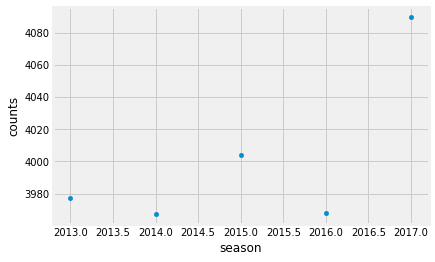

In [17]:
#df_home.query("win == True").groupby(['season', 'home_team']).agg(['count'])
# df_home.query("win == True").groupby('season').win.value_counts()
#df_home.plot(x='season', y=df_home.query("win == True").groupby('season').win.value_counts(), kind='scatter')
#df_home_wins = df_home.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_home_wins = df_home.groupby('season').win.value_counts().reset_index(name='counts').copy()
df_home_wins.plot(y='counts', x='season', kind='scatter')

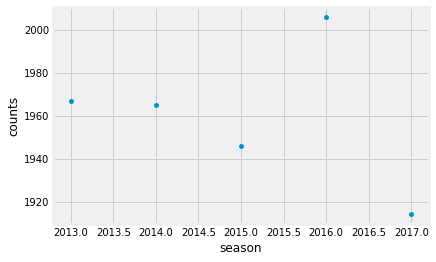

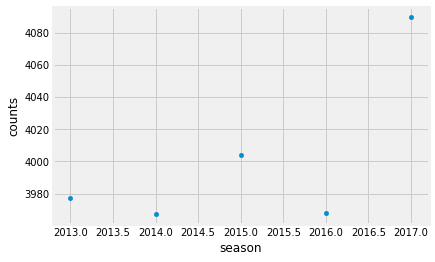

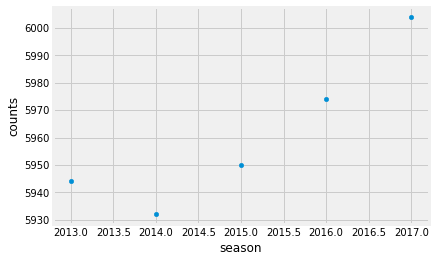

In [18]:
df_road_wins = df_road.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_road_wins.plot(y='counts', x='season', kind='scatter')

df_home_wins = df_home.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_home_wins.plot(y='counts', x='season', kind='scatter')

df_home_road_wins = df_home_road.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_home_road_wins.plot(y='counts', x='season', kind='scatter')

In [19]:
print(df_home_wins.head())
print(df_road_wins.head())
print(df_home_road_wins.head())

   season   win  counts
0    2013  True    3977
1    2014  True    3967
2    2015  True    4004
3    2016  True    3968
4    2017  True    4090
   season   win  counts
0    2013  True    1967
1    2014  True    1965
2    2015  True    1946
3    2016  True    2006
4    2017  True    1914
   season   win  counts
0    2013  True    5944
1    2014  True    5932
2    2015  True    5950
3    2016  True    5974
4    2017  True    6004


No handles with labels found to put in legend.


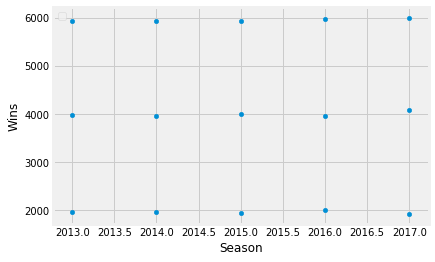

In [20]:
ax = df_home_wins.plot(y='counts', x='season', kind='scatter')
#df_road_wins.plot(ax=ax)
df_road_wins.plot(y='counts', x='season', kind='scatter', ax=ax)
df_home_road_wins.plot(y='counts', x='season', kind='scatter', ax=ax)
ax.set_ylabel('Wins')
ax.set_xlabel('Season')
ax.legend(loc='upper left')

In [21]:
#df_home.query("win == True")

df_home[df_home["win"]==True].count()["win"]

20006

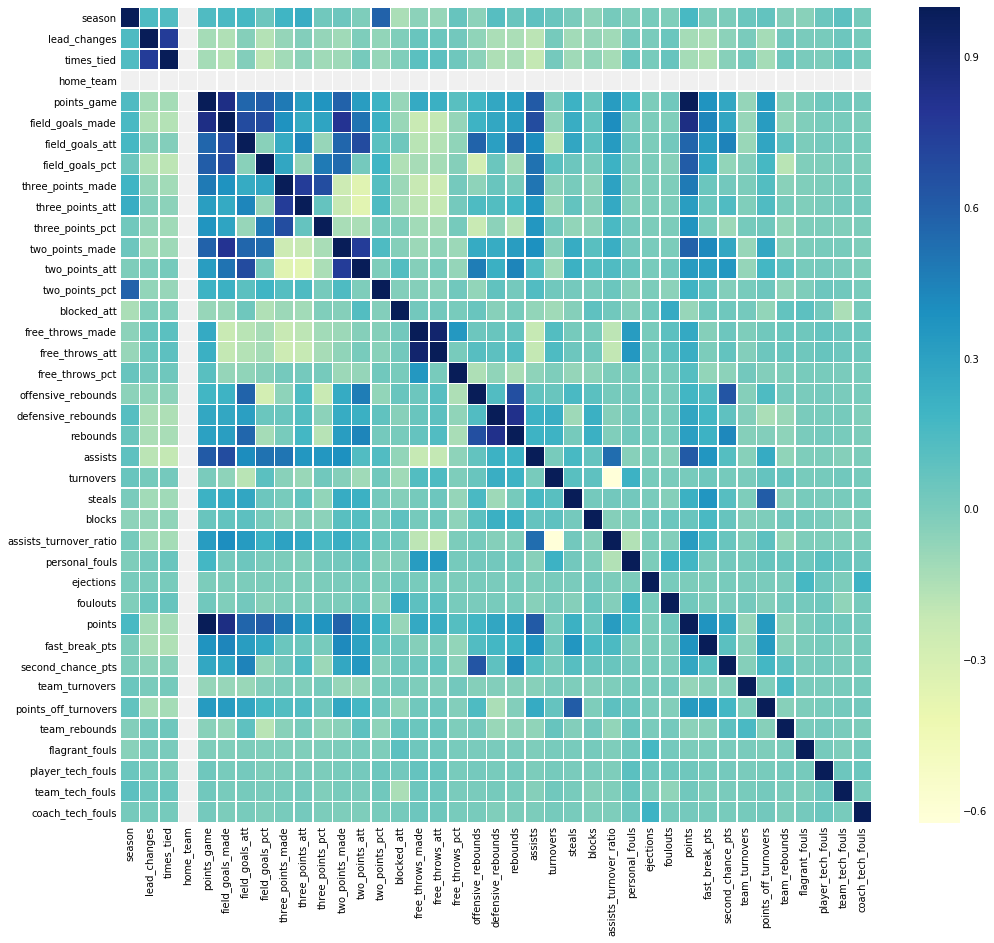

In [22]:
# get the correlation
fig, ax = plt.subplots(figsize=(15,15))
#df_home_wins_correlations=''
#df_home_wins_correlations = df_home.query("win == True")[['lead_changes', 'win', 'times_tied', 'points_game',
#       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
#       'three_points_made', 'three_points_att', 'three_points_pct',
#       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
#       'free_throws_made', 'free_throws_att', 'free_throws_pct',
       #'offensive_rebounds', 'defensive_rebounds', 
#                                                          'rebounds', 'assists',
#       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
#       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
#       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
#       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
#       'team_tech_fouls', 'coach_tech_fouls']].corr();
#sns.heatmap(df_home_wins_correlations, linewidths=.5, cmap="YlGnBu");

sns.heatmap(df_home.corr(), linewidths=.5, cmap="YlGnBu");


In [23]:
# lets take a look at the correlation matrix
df_home.corr()

,season,lead_changes,times_tied,home_team,points_game,field_goals_made,field_goals_att,field_goals_pct,three_points_made,three_points_att,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
season,1.000000,0.143912,0.133879,NaN,0.138595,0.158891,0.174235,0.046683,0.189748,0.235347,...,0.163240,-0.004456,-0.005520,0.049482,0.074937,-0.022764,-0.044400,0.050996,0.094183,0.014330
lead_changes,0.143912,1.000000,0.756082,NaN,-0.119265,-0.148526,-0.030982,-0.164757,-0.075297,-0.027046,...,-0.117855,-0.139794,-0.049309,0.003403,-0.120095,0.024942,0.000283,0.004754,0.048537,0.013757
times_tied,0.133879,0.756082,1.000000,NaN,-0.119575,-0.163445,-0.027325,-0.188282,-0.111668,-0.050237,...,-0.118362,-0.151180,-0.039399,0.010964,-0.122371,0.038773,0.003226,-0.004696,0.056571,0.015083
home_team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points_game,0.138595,-0.119265,-0.119575,NaN,1.000000,0.846848,0.559326,0.595570,0.481649,0.318063,...,0.994187,0.373595,0.269342,-0.077013,0.337951,-0.046225,-0.011234,0.039345,0.033247,0.018063
field_goals_made,0.158891,-0.148526,-0.163445,NaN,0.846848,1.000000,0.685044,0.687085,0.379950,0.252882,...,0.850786,0.433876,0.274393,-0.080542,0.333780,-0.068922,-0.020405,0.007186,0.009281,-0.007208
field_goals_att,0.174235,-0.030982,-0.027325,NaN,0.559326,0.685044,1.000000,-0.042561,0.249955,0.431384,...,0.568338,0.327524,0.446397,-0.087165,0.281837,0.089519,-0.007013,0.021804,0.015045,0.005082
field_goals_pct,0.046683,-0.164757,-0.188282,NaN,0.595570,0.687085,-0.042561,1.000000,0.274469,-0.075760,...,0.601798,0.253376,-0.065946,-0.026100,0.170469,-0.178991,-0.018897,-0.010463,-0.001799,-0.010199
three_points_made,0.189748,-0.075297,-0.111668,NaN,0.481649,0.379950,0.249955,0.274469,1.000000,0.755827,...,0.482767,0.048937,0.029274,-0.002341,0.126774,-0.045245,-0.020292,-0.003483,0.004268,0.004671
three_points_att,0.235347,-0.027046,-0.050237,NaN,0.318063,0.252882,0.431384,-0.075760,0.755827,1.000000,...,0.321564,0.050941,0.138872,-0.015264,0.139921,0.005475,-0.016211,0.003563,0.017681,0.017771


#### We see colinearity among a number of columns.
#### Our column selection could be as follows:
#### ['lead_changes', 'times_tied', 'points_game', 'minutes', 'field_goals_made', 'field_goals_att',
####  'three_points_made', 'three_points_att',  'two_points_made', 'two_points_att', 'blocked_att',
####  'free_throws_made', 'free_throws_att', rebounds', 'assists', 'turnovers', 'steals', 'blocks', 
####  'assists_turnover_ratio', 'personal_fouls', 'ejections', 'foulouts', 'fast_break_pts', 'second_chance_pts',
####  'team_turnovers', 'points_off_turnovers', 'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
####  'team_tech_fouls', 'coach_tech_fouls']

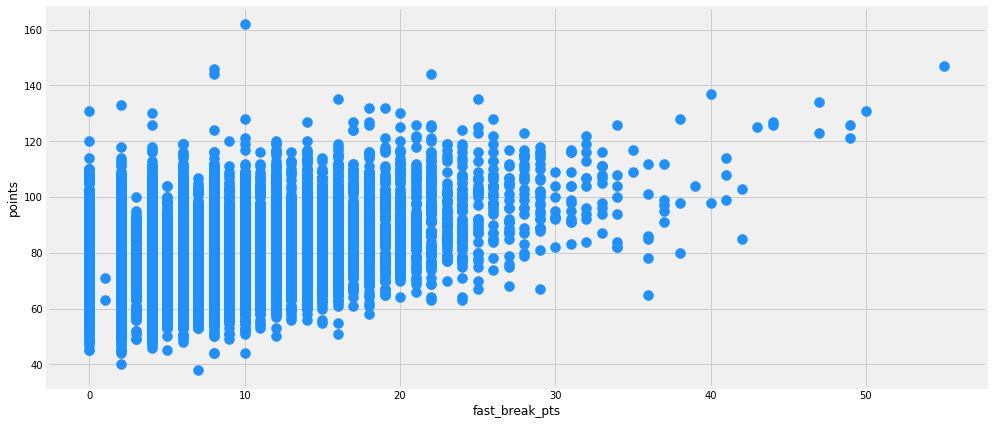

In [24]:
#df_home_wins_correlations.plot(x='assists', y='points', kind='scatter', 
#           color='dodgerblue', figsize=(15,7), s=100);

df_home.plot(x='fast_break_pts', y='points', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

#### Our new correlation heatmap is shown below

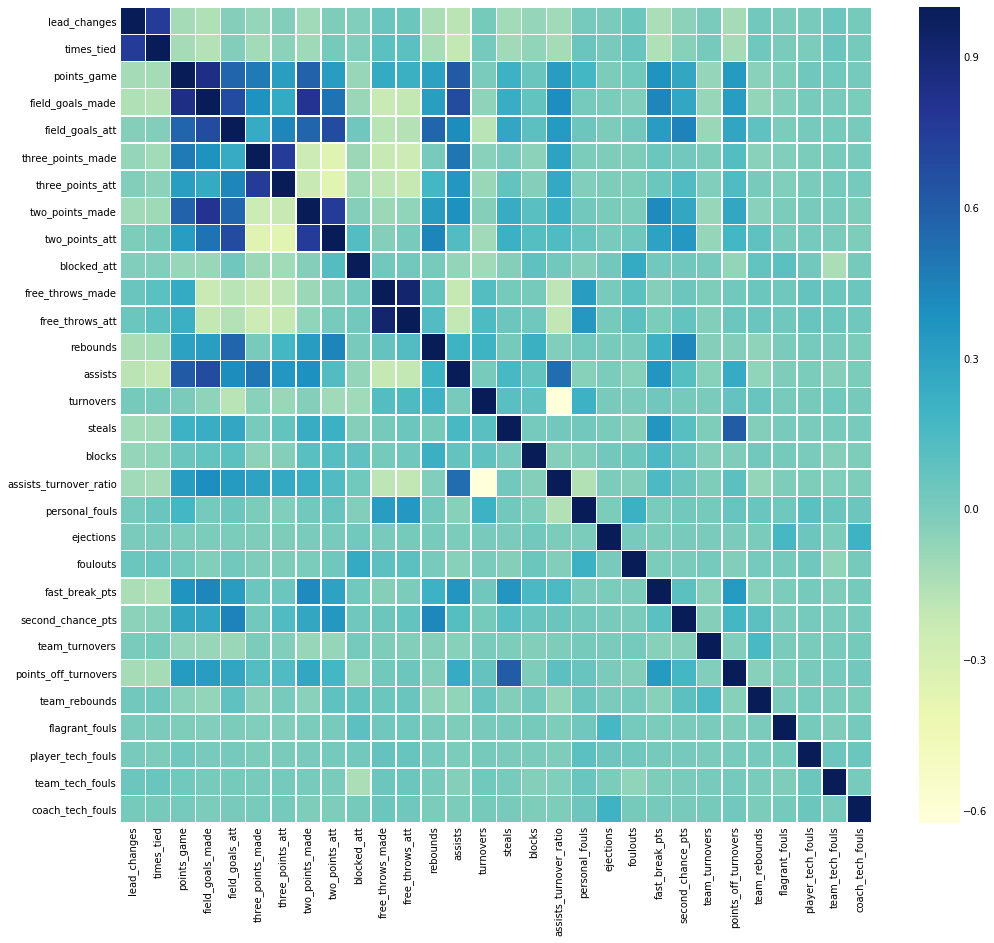

In [25]:
df_home = df_home[['lead_changes', 'times_tied', 'points_game', 'minutes', 'field_goals_made', 'field_goals_att',
'three_points_made', 'three_points_att', 'two_points_made', 'two_points_att', 'blocked_att',
'free_throws_made', 'free_throws_att', 'rebounds', 'assists', 'turnovers', 'steals', 'blocks',
'assists_turnover_ratio', 'personal_fouls', 'ejections', 'foulouts', 'fast_break_pts', 'second_chance_pts',
'team_turnovers', 'points_off_turnovers', 'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
'team_tech_fouls', 'coach_tech_fouls']].copy()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_home.corr(), linewidths=.5, cmap="YlGnBu");

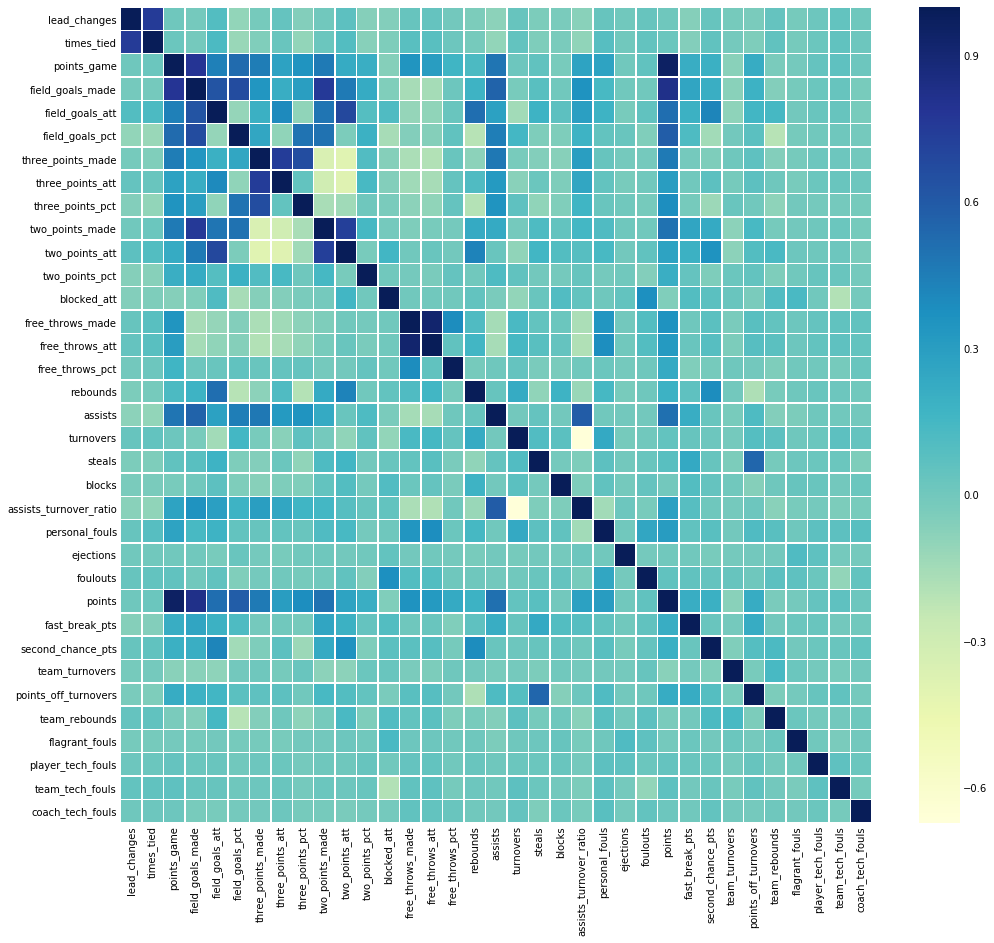

In [26]:
# get the correlation - road wins
fig, ax = plt.subplots(figsize=(15,15))
df_road_wins_correlations=''
df_road_wins_correlations = df_road.query("win == True")[['lead_changes', 'win', 'times_tied', 'points_game',
#df_road_wins_correlations = df_road[['lead_changes', 'win', 'times_tied', 'points_game',
       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
       'three_points_made', 'three_points_att', 'three_points_pct',
       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'free_throws_pct',
                                                          'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls']].corr();
sns.heatmap(df_road_wins_correlations, linewidths=.5, cmap="YlGnBu");

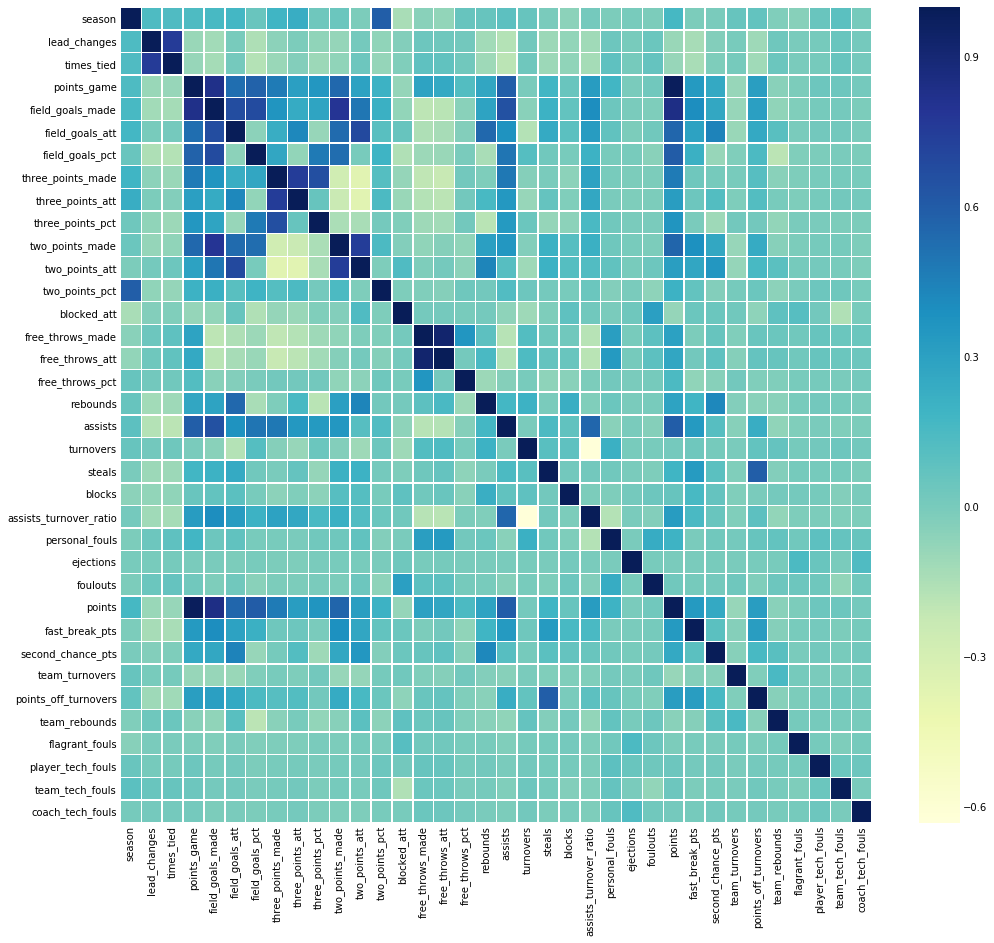

In [27]:
# get the correlation - home/road wins
fig, ax = plt.subplots(figsize=(15,15))
df_home_road_wins_correlations=''
df_home_road_wins_correlations = df_home_road.query("win == True")[['season','lead_changes', 'win', 'times_tied', 'points_game',
       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
       'three_points_made', 'three_points_att', 'three_points_pct',
       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'free_throws_pct',
       #'offensive_rebounds', 'defensive_rebounds', 
                                                          'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls']].corr();
sns.heatmap(df_home_road_wins_correlations, linewidths=.5, cmap="YlGnBu");

In [28]:
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

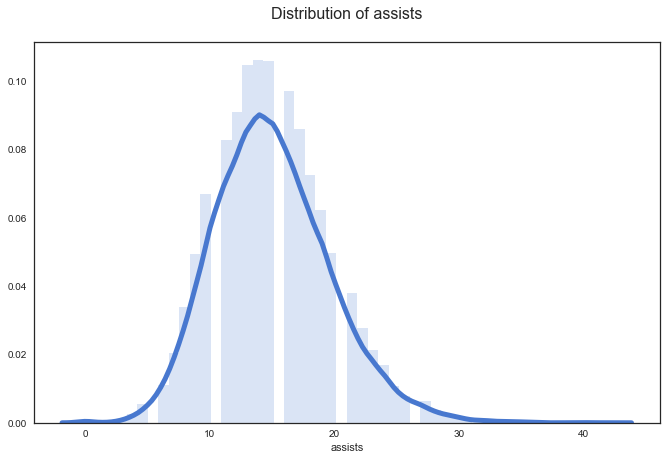

In [29]:
#distribution_plotter('points', df_home_road.query("win == True"))
#df_home_road_wins.describe
#df_home_road.fillna(value=0, axis=1, inplace=True)
#df_home_road.loc[:, df_home_road.isna().any()]
df_home_road_filtered = df_home_road[df_home_road['assists'].notnull()]
distribution_plotter('assists', df_home_road_filtered.query("win == True"))

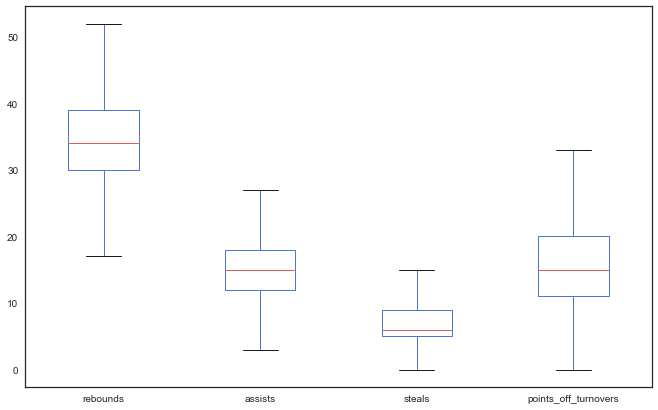

In [30]:
# lets look at the box plots
df_home_road[['rebounds', 'assists', 'steals', 'points_off_turnovers']].plot.box(showfliers=False);

In [31]:
# lets look at the data based on a group by team where win = True
# we'll include the following:
# name, field_goals_made, field_goals_att, three_points_made, three_points_att, two_points_made
# two_points_att, blocked_att, free_throws_made, free_throws_att
# offensive_rebounds, defensive_rebounds, rebounds, assists, turnovers, steals,
# blocks, personal_fouls, points, fast_break_pts, second_chance_pts, team_turnovers,
# points_off_turnovers, team_rebounds
df_groupby_team_wins = ''
df_groupby_team_wins = df.query("win == True")[['name', 'field_goals_made', 'field_goals_att', 'three_points_made', 'three_points_att', 'two_points_made',
    'two_points_att', 'blocked_att', 'free_throws_made', 'free_throws_att', 'offensive_rebounds', 'defensive_rebounds', 
    'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'points', 'fast_break_pts', 'second_chance_pts', 
    'team_turnovers', 'points_off_turnovers', 'team_rebounds']].copy()

df_groupby_team_wins = df_groupby_team_wins.groupby(['name'])['field_goals_made', 'field_goals_att', 'three_points_made', 'three_points_att', 'two_points_made',
    'two_points_att', 'blocked_att', 'free_throws_made', 'free_throws_att', #'offensive_rebounds', 'defensive_rebounds', 
    'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'points', 'fast_break_pts', 'second_chance_pts', 
    'team_turnovers', 'points_off_turnovers', 'team_rebounds'].agg('sum')

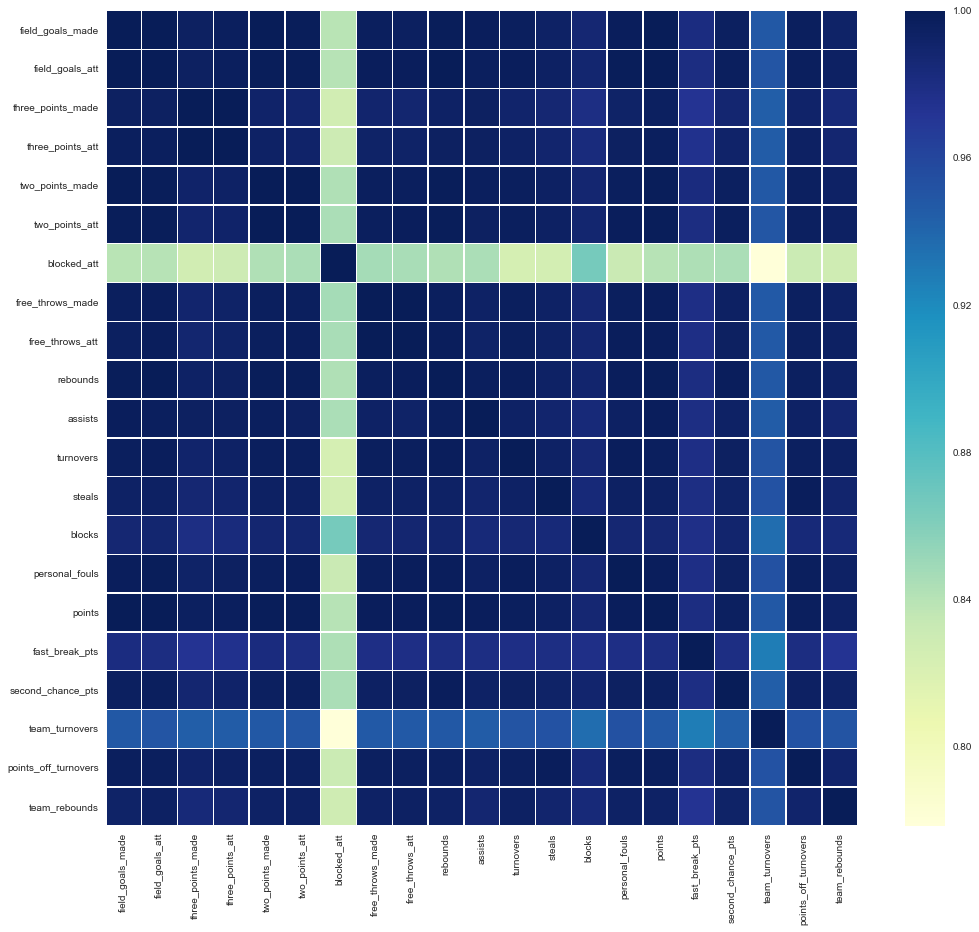

In [32]:
# get the correlation - home/road wins
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_groupby_team_wins.corr(), linewidths=.5, cmap="YlGnBu")  #, vmax=1.0, vmin=-1.0);

#### Define feature columns

In [33]:
#feature_cols = ['name', 'field_goals_made', 'field_goals_att', 'three_points_made', 'three_points_att', 'two_points_made',
#    'two_points_att', 'blocked_att', 'free_throws_made', 'free_throws_att', 'offensive_rebounds', 'defensive_rebounds', 
#    'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'points', 'fast_break_pts', 'second_chance_pts', 
#    'team_turnovers', 'points_off_turnovers', 'team_rebounds']

# we're going to look at points as our response variable
feature_cols = ['lead_changes', 'times_tied', 'field_goals_made',
       'field_goals_att', 'field_goals_pct', 'three_points_made',
       'three_points_att', 'three_points_pct', 'two_points_made',
       'two_points_att', 'two_points_pct', 'blocked_att', 'free_throws_made',
       'free_throws_att', 'free_throws_pct', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls']

In [34]:
df.head().T

,0,1,2,3,4
season,2015,2015,2015,2017,2017
lead_changes,6,0,2,0,8
times_tied,6,0,0,0,7
home_team,False,False,False,False,False
name,Flames,Flames,Warriors,Saints,Greyhounds
alias,BETH,BETH,LPC,RU,NaN
league_alias,NCAAM,NCAAM,NCAAM,NCAAM,NaN
conf_alias,D1-WEST,D1-WEST,D2-WEST,ACCA,NaN
division_alias,NCCAA,NCCAA,NCCAA,NCCAA,NaN
win,False,False,False,False,False


In [35]:
df_home_wins_correlations.head()
df_home_wins_correlations.columns

NameError: name 'df_home_wins_correlations' is not defined

In [ ]:
#columns with nan values
df_home.loc[:, df_home.isna().any()]
count_nan = len(df) - df_home.count()
count_nan

df_home.isna().any()

In [36]:
# Analyze missing values in our dataframe

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
missing_values_table(df_home)

Your selected dataframe has 31 columns.
There are 30 columns that have missing values.


,Missing Values,% of Total Values
coach_tech_fouls,12256,61.3
foulouts,11903,59.5
team_tech_fouls,11702,58.5
ejections,7865,39.3
fast_break_pts,3265,16.3
team_turnovers,2903,14.5
times_tied,2888,14.4
lead_changes,2855,14.3
second_chance_pts,2827,14.1
points_off_turnovers,2812,14.1


#### Note the high percentage of missing values for coach_tech_fouls, foulouts, team_tech_fouls and ejections.  These probably don't affect the outcome of the game and are rare events in basketball.

#### I've decided to to not use these in my feature columns.

#### Now, examine the distribution plots for the remainder of the columns with NaN.

In [38]:
df_home.columns.T

Index(['lead_changes', 'times_tied', 'points_game', 'minutes',
       'field_goals_made', 'field_goals_att', 'three_points_made',
       'three_points_att', 'two_points_made', 'two_points_att', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls'],
      dtype='object')

lead_changes 0
times_tied 1
points_game 2
field_goals_made 3
field_goals_att 4
three_points_made 5
three_points_att 6
two_points_made 7
two_points_att 8
blocked_att 9
free_throws_made 10
free_throws_att 11
rebounds 12
assists 13
turnovers 14
steals 15
blocks 16
assists_turnover_ratio 17
personal_fouls 18
ejections 19


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


foulouts 20
fast_break_pts 21
second_chance_pts 22
team_turnovers 23
points_off_turnovers 24
team_rebounds 25


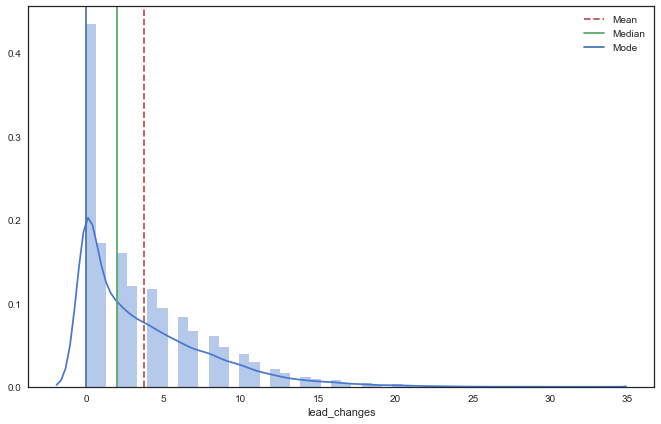

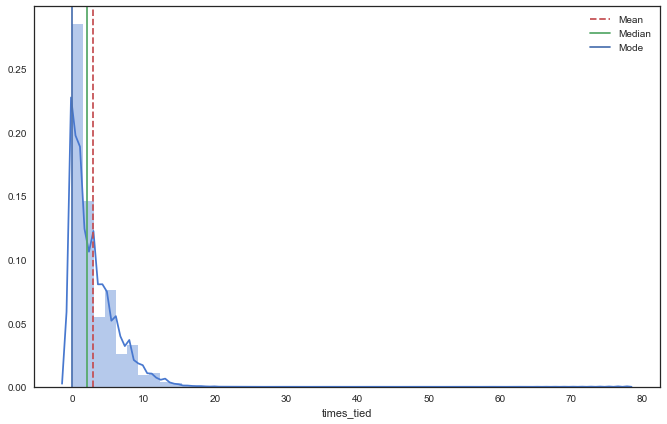

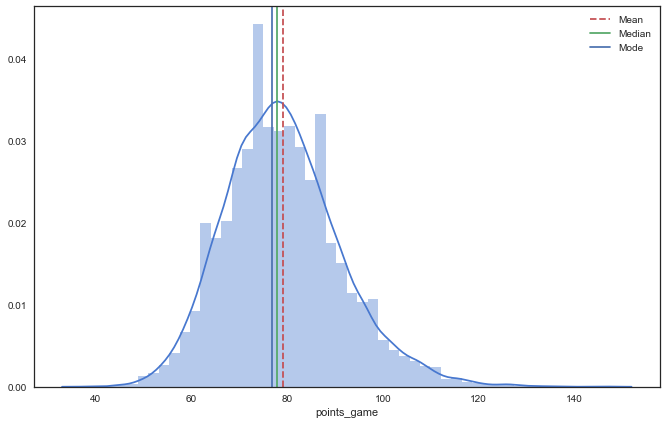

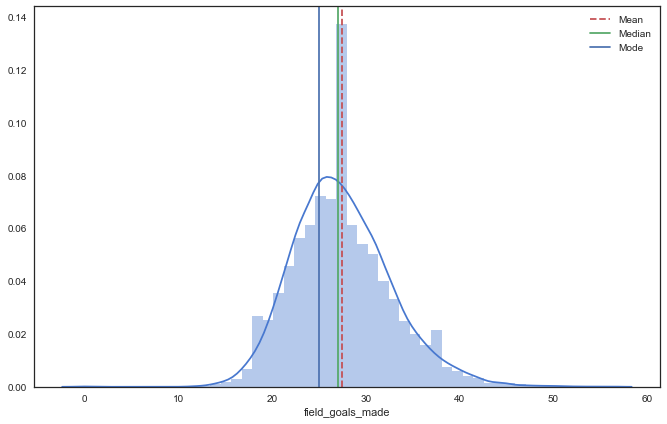

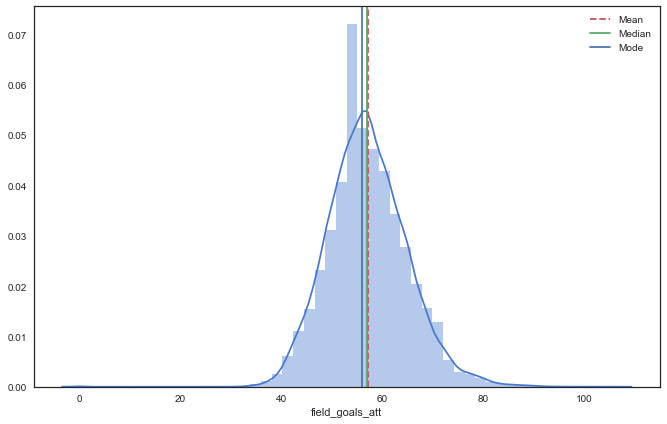

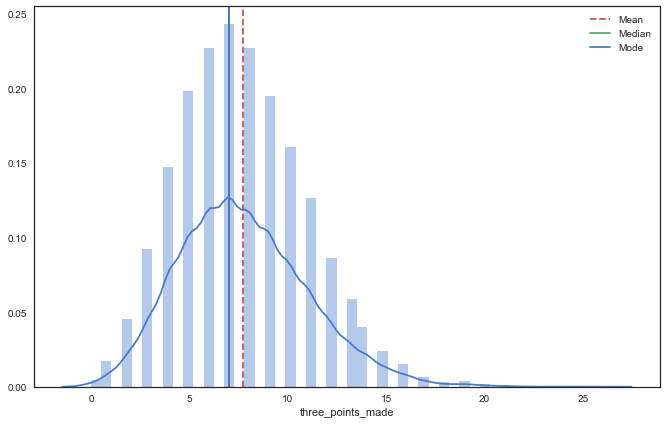

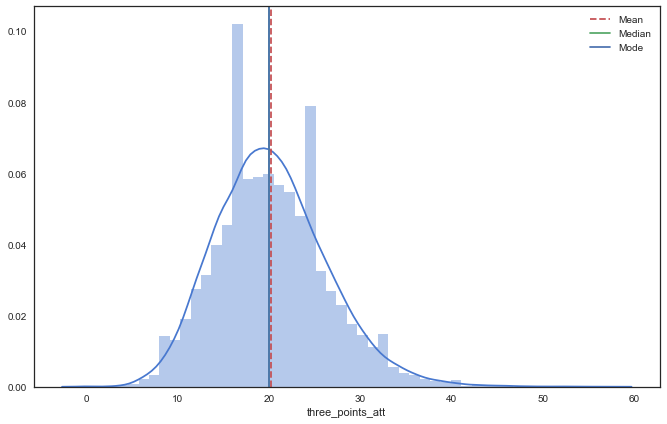

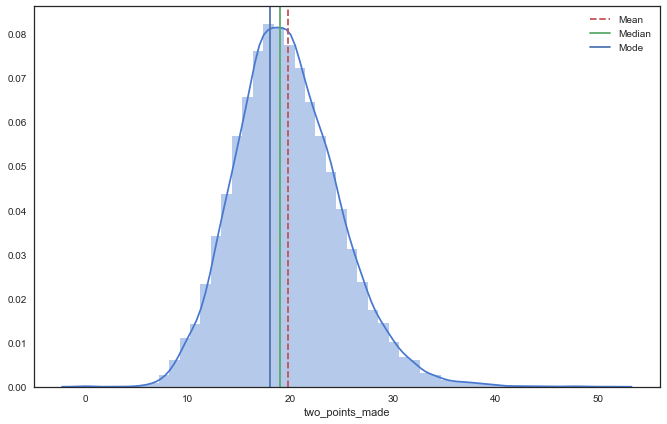

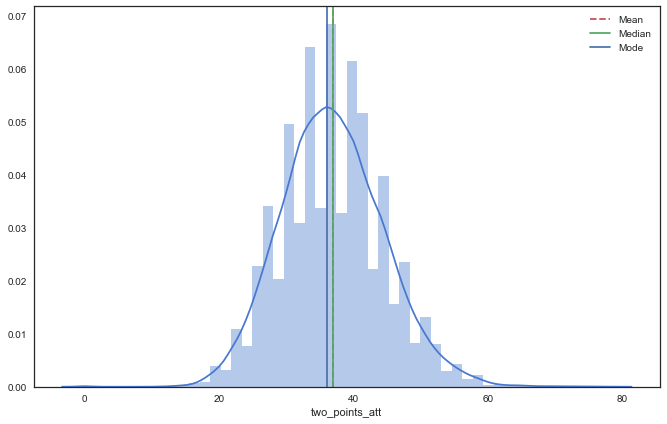

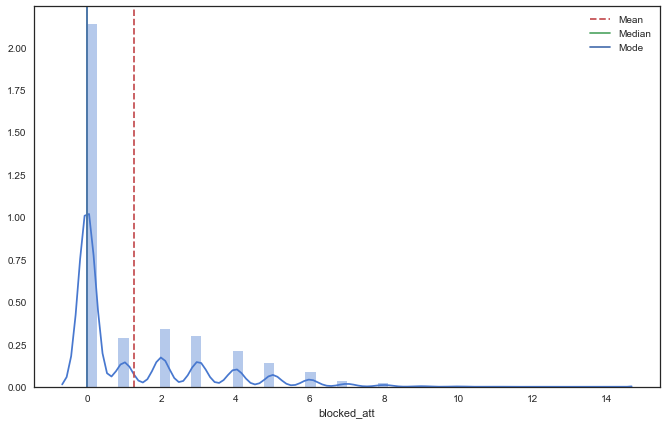

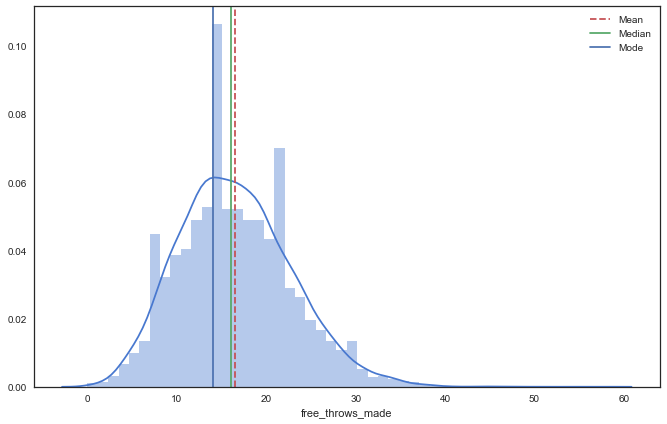

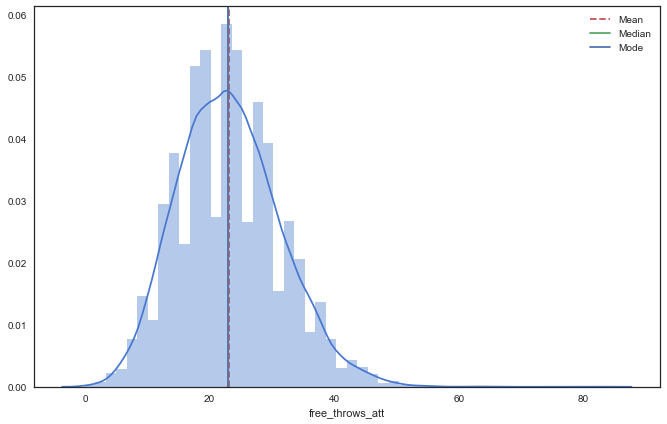

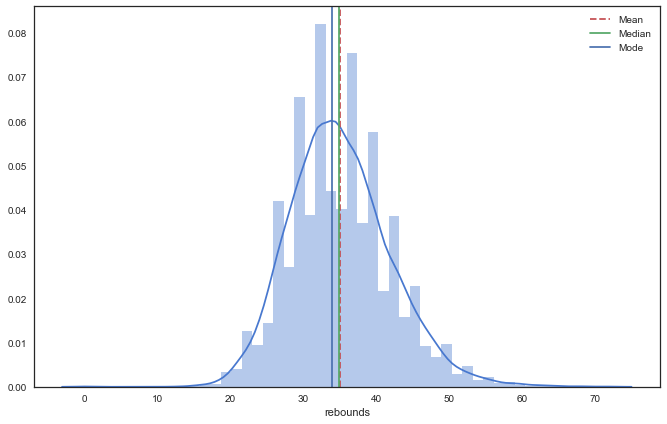

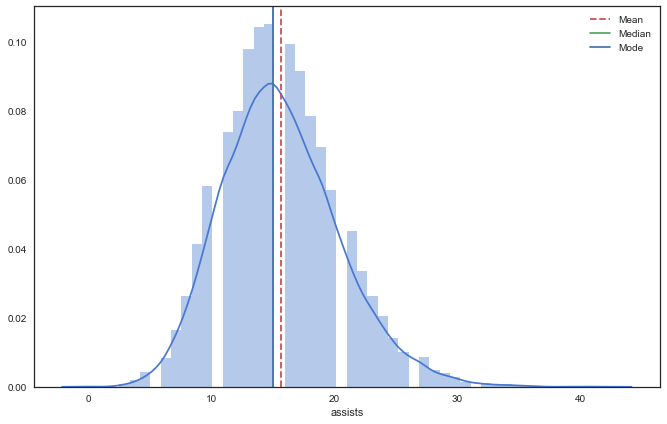

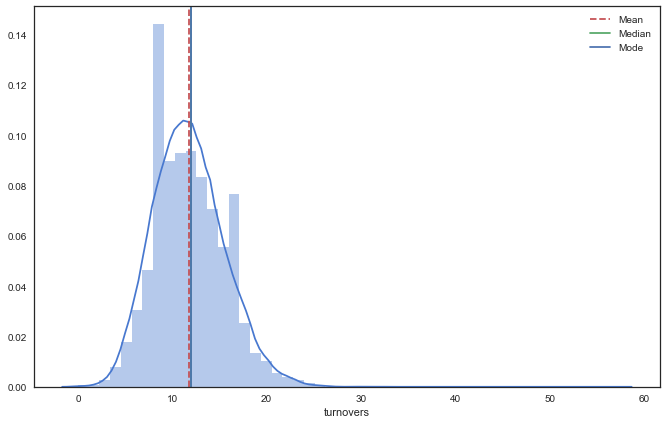

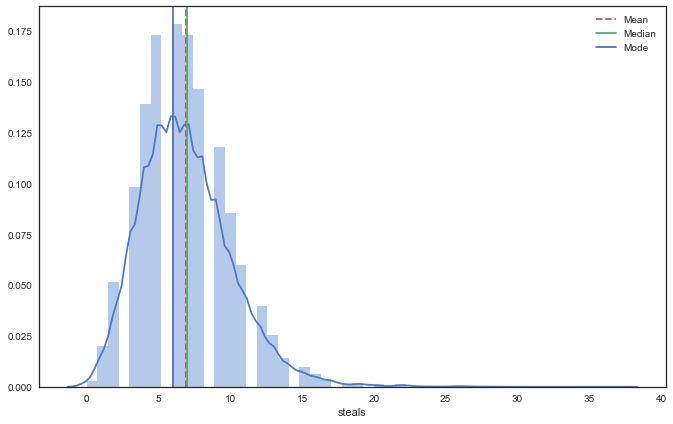

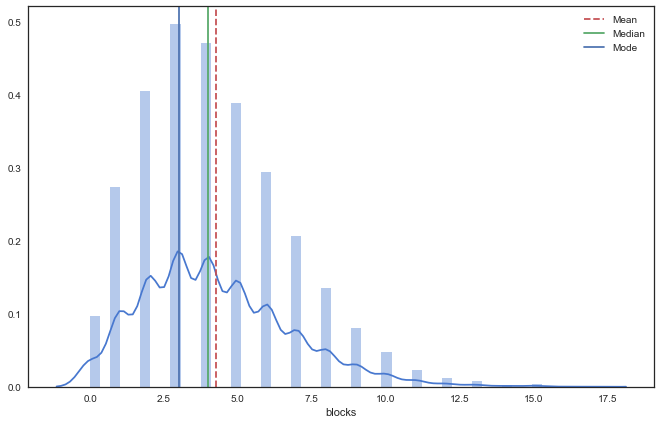

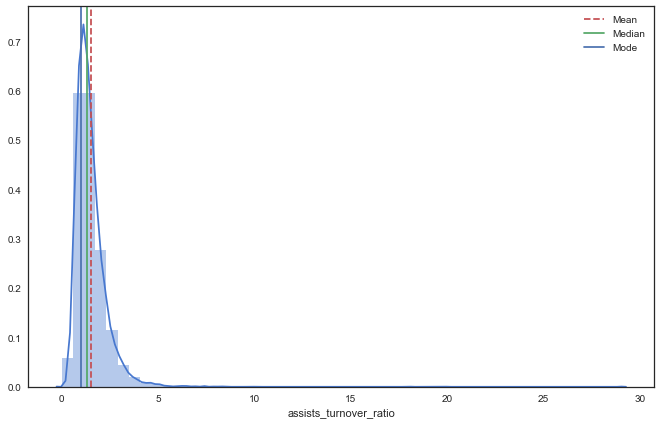

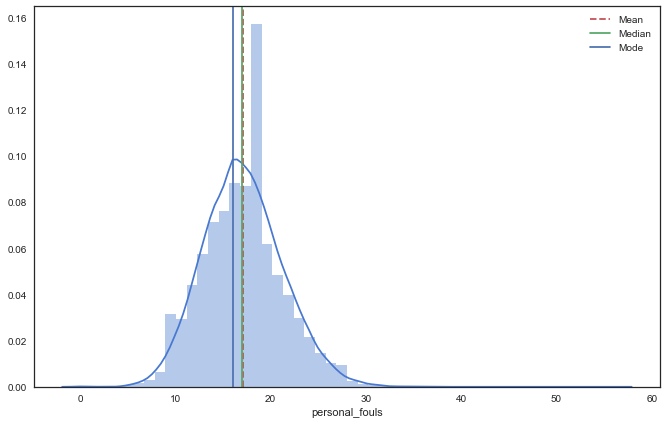

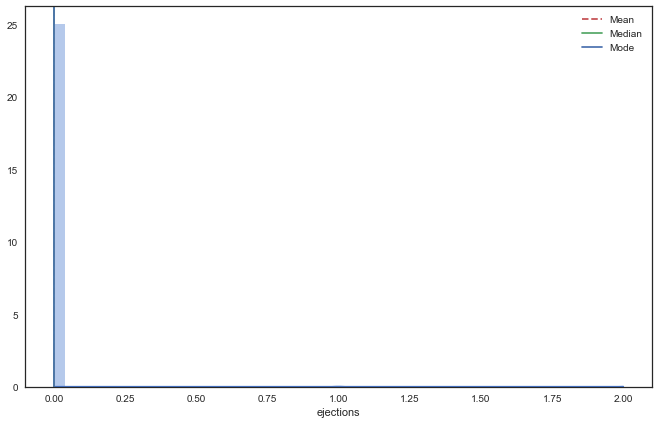

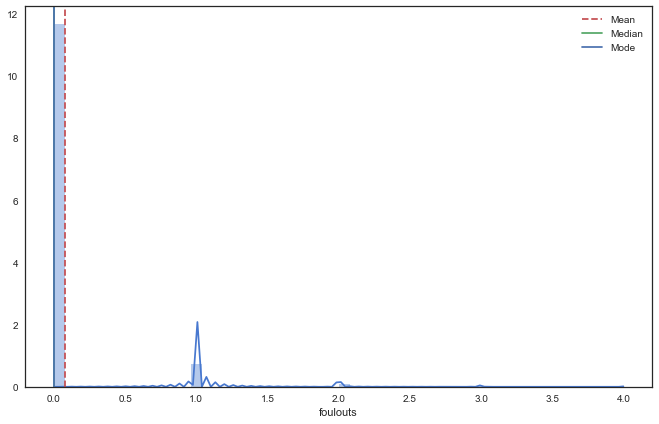

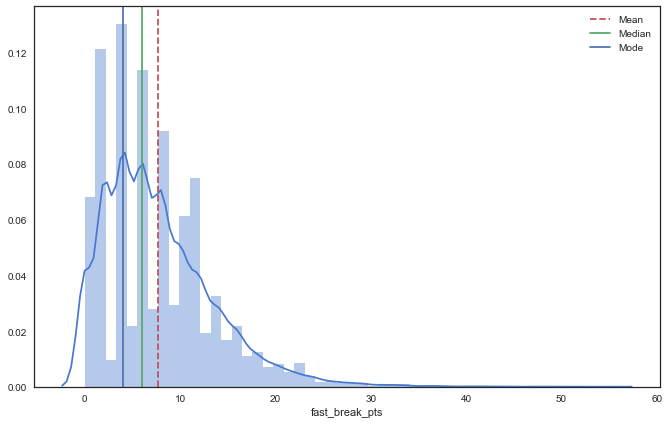

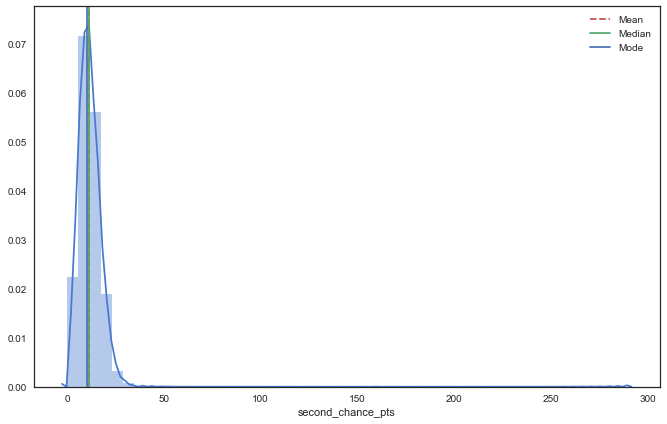

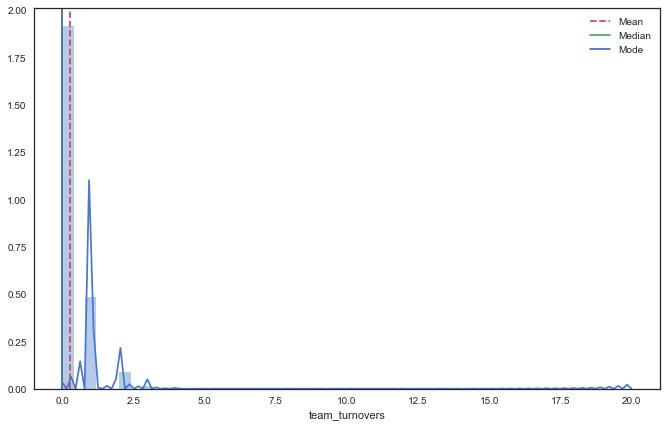

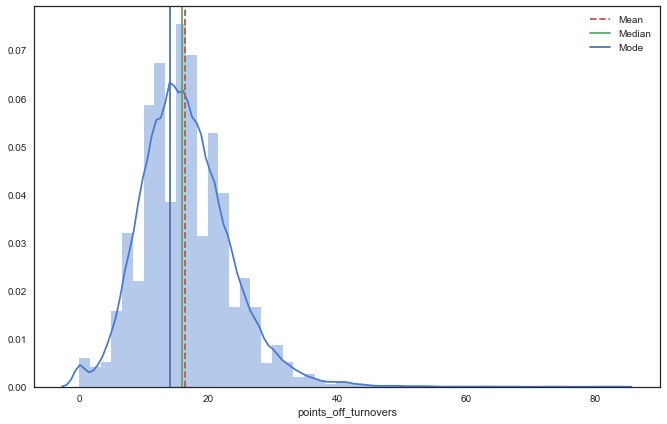

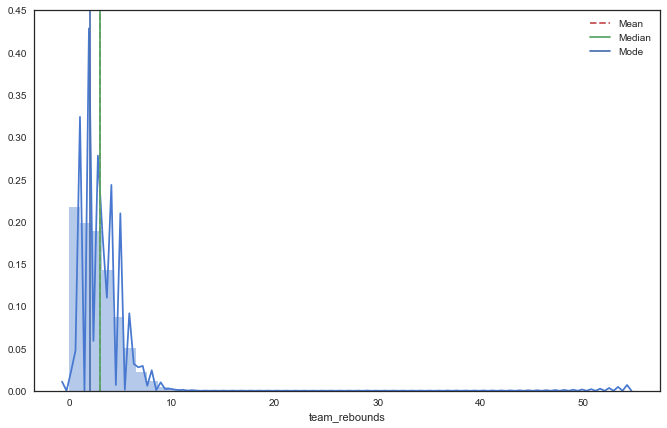

In [42]:
# plot the distribution of data
def plot_all(col, idx):
   sns_displot=''
   fig1=''
   plotname = col + str(idx) + ".png"
   
   # get mean, median, mode, and standard deviation
   mean1=df_home[col].dropna().mean()
   median1=df_home[col].dropna().median()
   mode1=df_home[col].dropna().mode().get_values()[0]
   sd1=df_home[col].dropna().std()

   # plot attributes
   fig1, ax = plt.subplots(sharex=True)
   #fig1.set_size_inches(11.7, 8.27)

   sns.distplot(df_home[col].dropna(), ax=ax)
   ax.axvline(mean1, color='r', linestyle='--')
   ax.axvline(median1, color='g', linestyle='-')
   ax.axvline(mode1, color='b', linestyle='-')

   # set the legend
   plt.legend({'Mean':mean1,'Median':median1,'Mode':mode1})

   #fig1 = sns_displot.get_figure()
   #fig1.savefig(plotname)
   
   # figure out which is the best metric to use to fill missing values
   #dist1 = abs(mean1 - sd1)
   #dist2 = abs(mean1 - sd1)
   #dist3 = abs(mode1 - sd1)
   #fill_value = min(dist1, dist2, dist3)
   #print('the fill value should be : ', fill_value)
   
COLS = ['lead_changes', 'times_tied', 'points_game', 'field_goals_made', 'field_goals_att',
'three_points_made', 'three_points_att', 'two_points_made', 'two_points_att', 'blocked_att',
'free_throws_made', 'free_throws_att', 'rebounds', 'assists', 'turnovers', 'steals', 'blocks',
'assists_turnover_ratio', 'personal_fouls', 'ejections', 'foulouts', 'fast_break_pts', 'second_chance_pts',
'team_turnovers', 'points_off_turnovers', 'team_rebounds']
  
for col in COLS:
   plot_all(col, COLS.index(col))
   print(col, COLS.index(col))


#### Examining the distribution plots above, it's noted that for the most part, the mean, median and mode are fairly close to each other.
#### In this case, I've decided to use the mean to replace NaN values instead of dropping the rows.

In [70]:
df_home.fillna(df_home.mean(), inplace=True)

In [71]:
df_home.head(10)

,lead_changes,times_tied,points_game,minutes,field_goals_made,field_goals_att,three_points_made,three_points_att,two_points_made,two_points_att,...,foulouts,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
6664,0.0,0.0,104,3:20:00,38.0,60.0,10.0,19.0,28.0,41.0,...,0.080094,7.739143,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6665,1.0,4.0,70,3:20:00,25.0,53.0,7.0,17.0,18.0,36.0,...,0.080094,9.000000,12.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0
6666,5.0,4.0,65,3:20:00,20.0,51.0,7.0,22.0,13.0,29.0,...,0.080094,7.000000,11.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0
6667,1.0,0.0,73,3:20:00,23.0,47.0,7.0,17.0,16.0,30.0,...,0.080094,4.000000,4.0,0.0,16.0,3.0,0.0,1.0,0.0,0.0
6668,7.0,6.0,85,3:20:00,24.0,67.0,10.0,30.0,14.0,37.0,...,0.080094,6.000000,25.0,0.0,18.0,7.0,0.0,2.0,0.0,0.0
6670,7.0,9.0,82,3:20:00,27.0,46.0,6.0,18.0,21.0,28.0,...,0.080094,8.000000,2.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0
6671,3.0,3.0,78,3:20:00,25.0,51.0,10.0,19.0,15.0,32.0,...,0.080094,13.000000,6.0,0.0,23.0,2.0,0.0,0.0,0.0,0.0
6672,0.0,2.0,76,3:20:00,24.0,60.0,5.0,13.0,19.0,47.0,...,0.080094,9.000000,11.0,0.0,11.0,3.0,0.0,0.0,0.0,0.0
6673,8.0,7.0,97,3:20:00,31.0,60.0,9.0,26.0,22.0,34.0,...,0.080094,6.000000,14.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0
6674,6.0,6.0,72,3:20:00,21.0,58.0,6.0,20.0,15.0,38.0,...,0.080094,4.000000,15.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0


#### Now that NaNs have been replaced with the mean, lets do some analysis

In [72]:
# Create X and y.
feature_cols = ['lead_changes', 'times_tied', 'field_goals_made', 'field_goals_att',
'three_points_made', 'three_points_att', 'two_points_made', 'two_points_att', 'blocked_att',
'free_throws_made', 'free_throws_att', 'rebounds', 'assists', 'turnovers', 'steals', 'blocks',
'assists_turnover_ratio', 'personal_fouls', 'ejections', 'foulouts', 'fast_break_pts', 'second_chance_pts',
'team_turnovers', 'points_off_turnovers', 'team_rebounds']

X = df_home[feature_cols]
y = df_home.points_game

#TTS

# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression #RandomForestRegressor
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

2.691861191642502
[-4.52406901e-03  1.21213918e-02  1.41909881e+12 -6.27233136e+12
 -1.41909881e+12  6.27233136e+12 -1.41909881e+12  6.27233136e+12
 -1.03567919e-02  9.98535156e-01 -1.22070312e-02  4.88281250e-03
  1.61132812e-02 -5.27343750e-02 -5.85937500e-03 -6.59179688e-03
 -1.50390625e-01 -1.17187500e-02 -3.85529995e-02  9.44213867e-02
  1.44042969e-02  1.22070312e-02 -1.48773193e-02  5.85937500e-03
  2.31933594e-02]


In [88]:
# train/test/split and check for accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
dict(zip(linreg.coef_,X.columns))

{-6272331362184.688: 'field_goals_att',
 -1419098808039.0964: 'two_points_made',
 -1419098808038.1003: 'three_points_made',
 -0.150390625: 'assists_turnover_ratio',
 -0.052734375: 'turnovers',
 -0.03855299949645996: 'ejections',
 -0.0148773193359375: 'team_turnovers',
 -0.01220703125: 'free_throws_att',
 -0.01171875: 'personal_fouls',
 -0.010356791921483283: 'blocked_att',
 -0.006591796875: 'blocks',
 -0.005859375: 'steals',
 -0.0045240690099779095: 'lead_changes',
 0.0048828125: 'rebounds',
 0.005859375: 'points_off_turnovers',
 0.012121391820430538: 'times_tied',
 0.01220703125: 'second_chance_pts',
 0.014404296875: 'fast_break_pts',
 0.01611328125: 'assists',
 0.023193359375: 'team_rebounds',
 0.09442138671875: 'foulouts',
 0.99853515625: 'free_throws_made',
 1419098808041.098: 'field_goals_made',
 6272331362184.648: 'three_points_att',
 6272331362184.649: 'two_points_att'}

In [90]:
# view the predictions
print(predictions)

[75.45021959 80.29000448 79.55660753 ... 79.05826572 66.86545312
 77.97291223]


Text(0,0.5,'Predictions')

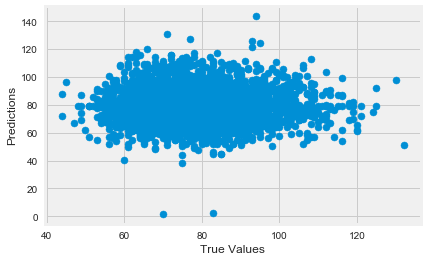

In [91]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [94]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8391531164369952


In [ ]:
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    #df_home_wins_correlations.plot(kind='scatter', x=feature, y='points', ax=axs[index], figsize=(16, 3))
    sns.pairplot(df_home_wins_correlations, x_vars=feature_cols[index], y_vars='points', kind='reg', dropna=True, size=5);

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)  #Adds our y intercept
est = sm.OLS(y, X2)  # adds our OLS model
est2 = est.fit() # fits our model
print(est2.summary()) 

#feature_cols = []
#X = df_home_wins_correlations[feature_cols]
#y = df_home_wins_correlations.points

In [ ]:
#feature_cols = ['field_goals_made','field_goals_att','field_goals_pct','three_points_made','three_points_att','three_points_pct',
# 'two_points_made','two_points_att','two_points_pct','blocked_att','free_throws_made','free_throws_att','rebounds',
#'assists','fast_break_pts','second_chance_pts','points_off_turnovers']


feature_cols = ['field_goals_made','field_goals_att','three_points_made','three_points_att',
 'two_points_made','two_points_att','blocked_att','free_throws_made','free_throws_att','rebounds',
'assists','fast_break_pts','second_chance_pts','points_off_turnovers']

df_home_wins_correlations.columns
# Our new feature columns
X = df_home_wins_correlations[feature_cols]
#y = df_home_wins_correlations.points

X2 = sm.add_constant(X)  #Adds our y intercept
est = sm.OLS(y, X2)  # adds our OLS model
est2 = est.fit() # fits our model
print(est2.summary()) 

In [ ]:
df_home_wins_correlations.head()